# Clasificación y Regresión usando Keras

En este notebook, vamos a utilizar Keras para resolver problemas de clasificación y regresión. Para la clasificación, usaremos el dataset Iris. Para la regresión, usaremos el dataset de viviendas de California.

## 1. Clasificación con el dataset Iris

### Carga y Visualización de los Datos

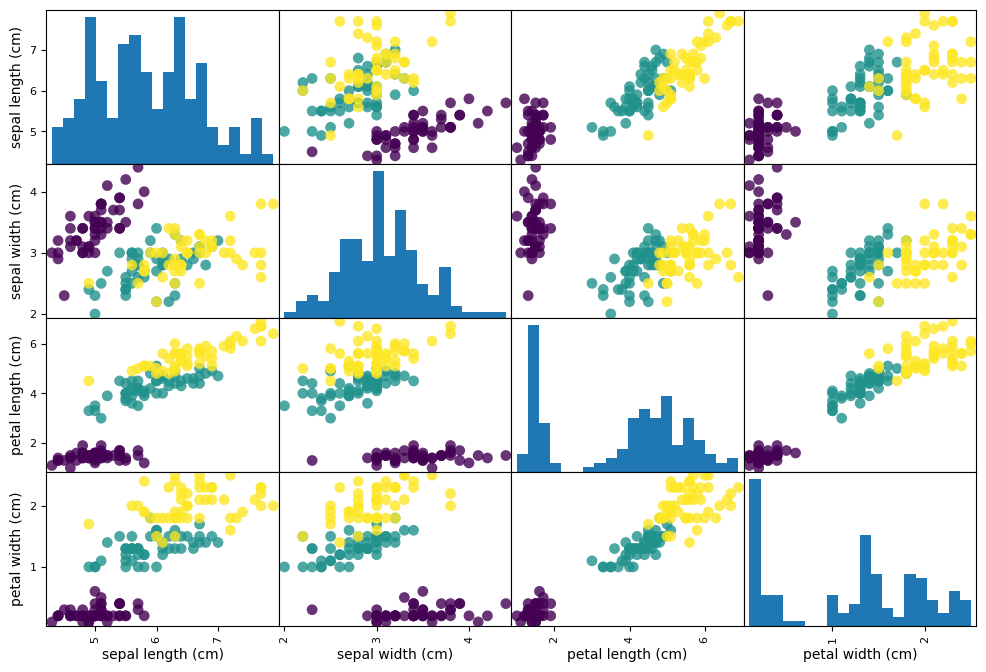

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convertir a DataFrame para mejor visualización
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df['target'] = df['target'].apply(lambda x: target_names[x])
df.head()

# Visualizar la distribución de las características
pd.plotting.scatter_matrix(df, figsize=(12, 8), c=target, marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()


### Limpieza de Datos

In [10]:
# Eliminar outliers y valores vacíos
from scipy import stats

# Eliminar outliers
z_scores = np.abs(stats.zscore(df[feature_names]))
df = df[(z_scores < 3).all(axis=1)]

# Verificar valores vacíos
df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


### Selección de Características

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las mejores características
X = df[feature_names].values
y = df['target'].values
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features = np.array(feature_names)[selector.get_support()]
print("Características seleccionadas: ", selected_features)


Características seleccionadas:  ['petal length (cm)' 'petal width (cm)']


### División de los Conjuntos en Entrenamiento, Prueba y Validación

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas como valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el dataset en entrenamiento y prueba
# Usar y_encoded en lugar de y
x_train, x_test, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convertir etiquetas a one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### Definición del Modelo

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),  # Capa oculta con 128 unidades y función de activación ReLU
    Dense(64, activation='relu'),  # Capa oculta con 64 unidades y función de activación ReLU
    Dense(3, activation='softmax')  # Capa de salida con 3 unidades (clases) y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Entrenamiento del Modelo

In [14]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5132 - loss: 1.0301 - val_accuracy: 0.7333 - val_loss: 0.9330
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6996 - loss: 0.9208 - val_accuracy: 0.7333 - val_loss: 0.8437
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6915 - loss: 0.8532 - val_accuracy: 0.7333 - val_loss: 0.7691
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7209 - loss: 0.7633 - val_accuracy: 0.7333 - val_loss: 0.7038
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6959 - loss: 0.7253 - val_accuracy: 0.7333 - val_loss: 0.6472
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7032 - loss: 0.6542 - val_accuracy: 0.7333 - val_loss: 0.5970
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7347 - loss: 0.5865 - val_accuracy: 0.7333 - val_loss: 0.5547
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7003 - loss: 0.5776 - val_accuracy: 0.7333 - val_loss: 0.5200
Ep

### Evaluación del Modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9000 - loss: 0.2596
Test accuracy: 0.8999999761581421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Matriz de confusión:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



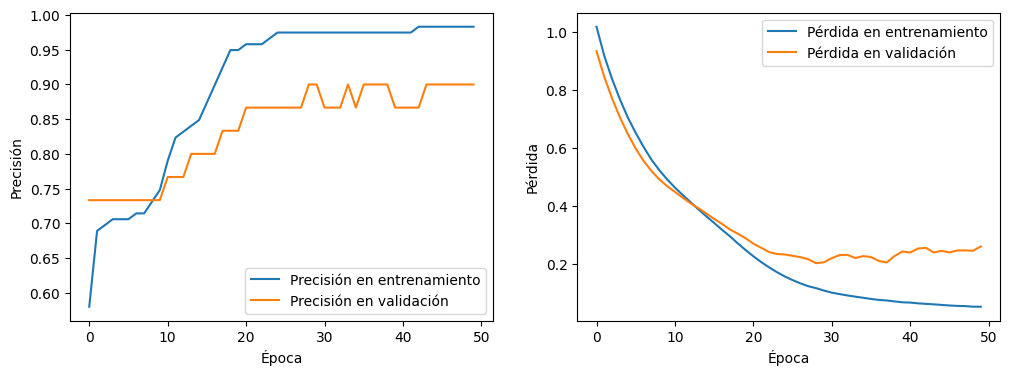

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_true, y_pred, target_names=target_names)
print("Reporte de clasificación:\n", class_report)

# Graficar curvas de precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## 2. Regresión con el dataset de viviendas de California

### Carga y Visualización de los Datos

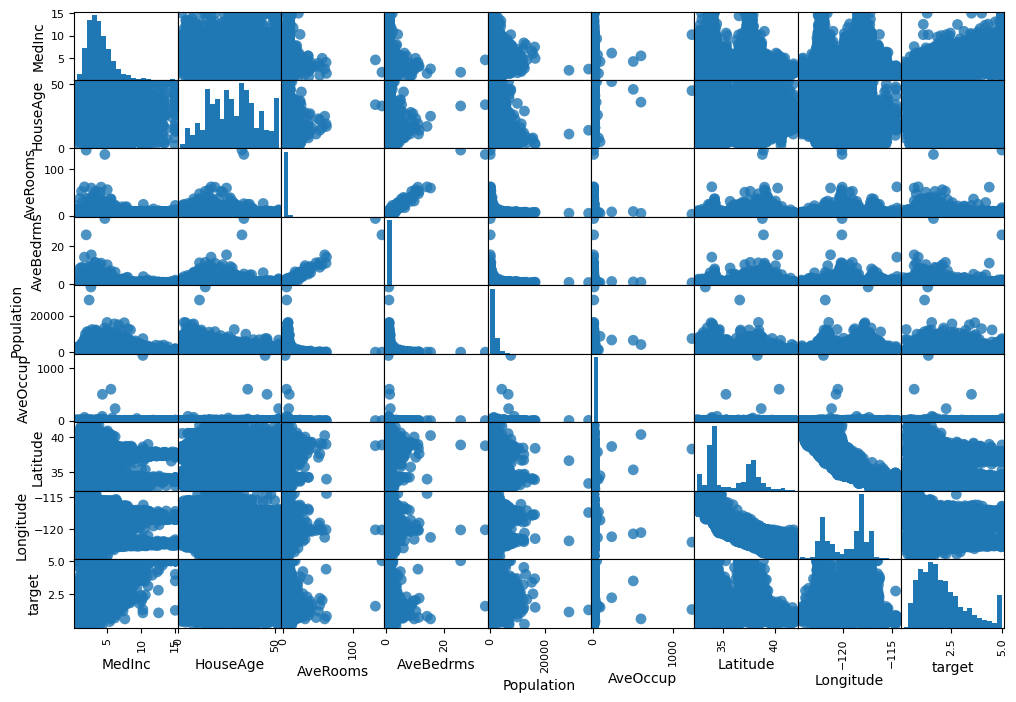

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Cargar el dataset de viviendas de California
california = fetch_california_housing()
data = california.data
target = california.target
feature_names = california.feature_names

# Convertir a DataFrame para mejor visualización
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df.head()

# Visualizar la distribución de las características
pd.plotting.scatter_matrix(df, figsize=(12, 8), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()


### Limpieza de Datos

In [17]:
# Eliminar outliers y valores vacíos
from scipy import stats

# Eliminar outliers
z_scores = np.abs(stats.zscore(df[feature_names]))
df = df[(z_scores < 3).all(axis=1)]

# Verificar valores vacíos
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


### Selección de Características

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las mejores características
X = df[feature_names].values
y = df['target'].values
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = np.array(feature_names)[selector.get_support()]
print("Características seleccionadas: ", selected_features)


Características seleccionadas:  ['MedInc' 'HouseAge' 'AveRooms' 'AveOccup' 'Latitude']


### División de los Conjuntos en Entrenamiento, Prueba y Validación

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### Definición del Modelo

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),  # Capa oculta con 128 unidades y función de activación ReLU
    Dense(64, activation='relu'),  # Capa oculta con 64 unidades y función de activación ReLU
    Dense(1)  # Capa de salida con 1 unidad (valor de precio)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Entrenamiento del Modelo

In [21]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.9795 - mae: 0.7046 - val_loss: 0.4505 - val_mae: 0.4750
Epoch 2/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4338 - mae: 0.4768 - val_loss: 0.4266 - val_mae: 0.4664
Epoch 3/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4223 - mae: 0.4723 - val_loss: 0.4194 - val_mae: 0.4579
Epoch 4/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4067 - mae: 0.4564 - val_loss: 0.4182 - val_mae: 0.4579
Epoch 5/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4151 - mae: 0.4637 - val_loss: 0.4088 - val_mae: 0.4571
Epoch 6/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4092 - mae: 0.4579 - val_loss: 0.4218 - val_mae: 0.4547
Epoch 7/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3830 - mae: 0.4438 - val_loss: 0.4039 - val_mae: 0.4437
Epoch 8/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3966 - mae: 0.4485 - val_loss: 0.4122 - val_mae: 0.4415
Epoch 9/100
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

### Evaluación del Modelo

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3817 - mae: 0.4260
Test MAE: 0.43306460976600647


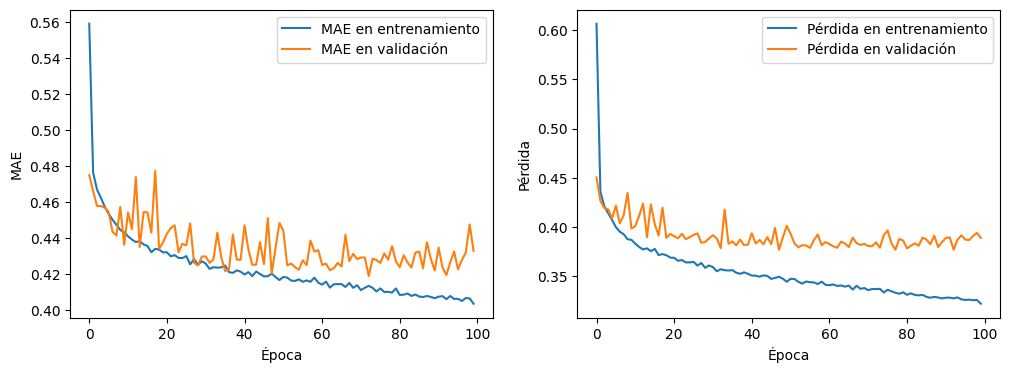

In [22]:
# Evaluar el modelo
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: {test_mae}')

# Graficar curvas de MAE y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE en entrenamiento')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
